In [20]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [21]:
#https://github.com/fraunhoferhhi/BerlinV2X
sidelink='/data22/bde/Data/BerlinV2X/sidelink_dataframe.parquet'
cellular='/data22/bde/Data/BerlinV2X/cellular_dataframe.parquet'
df = pd.read_parquet(cellular)
#df.info(verbose=True)

In [22]:
# Filter only for downlink datarate measurements
filtered_data = df.query("direction == 'downlink' & measured_qos == 'datarate'")

# Remove incomplete measurements without datarate
filtered_data = filtered_data.dropna(subset='datarate')

# Train and test split along operators
train_data = filtered_data.query("operator == 1")
train_data_1 = train_data.query("device == 'pc1'")
train_data_2 = train_data.query("device == 'pc2'")
train_data_3 = train_data.query("device == 'pc3'")
train_data_4 = train_data.query("device == 'pc4'")

test_data = filtered_data.query("operator == 2")
test_data_1 = test_data.query("device == 'pc1'")
test_data_2 = test_data.query("device == 'pc2'")
test_data_3 = test_data.query("device == 'pc3'")
test_data_4 = test_data.query("device == 'pc4'")

In [23]:
print(len(train_data_1))
print(len(train_data_2))
print(len(train_data_3))
print(len(train_data_4))

19564
0
0
9554


In [24]:
print(len(test_data_1))
print(len(test_data_2))
print(len(test_data_3))
print(len(test_data_4))

0
8779
14776
0


In [25]:
qos_column = 'datarate'
feature_columns = [
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

all_columns = [
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

x_train, y_train = train_data_1[feature_columns], train_data_1[qos_column]
x_test, y_test = test_data_3[feature_columns], test_data_3[qos_column]

all_data_informer = train_data_1[all_columns]

# Missing value imputation
#x_train = x_train.fillna(0)
#x_test = x_test.fillna(0)
all_data_informer = all_data_informer.fillna(0)
all_data_informer['date'] = all_data_informer.index.tz_localize(None)
all_data_informer.to_csv(f'data/BERLINV2X/berlin-operator1-pc1.csv', encoding='utf-8', index=False)

used_features = len(feature_columns)
print(f"The implementation uses {used_features} features")

len_x_train = len(x_train)
print(f"The implementation uses {len_x_train} time steps for training")

len_x_test = len(x_test)
print(f"The implementation uses {len_x_test} time steps for testing")


print(f"The Informer uses {len(all_data_informer)} time steps and {len(all_columns)} features")

The implementation uses 39 features
The implementation uses 19564 time steps for training
The implementation uses 14776 time steps for testing
The Informer uses 19564 time steps and 40 features


In [26]:
informer_1 = train_data_1[all_columns].fillna(0)
informer_2 = train_data_4[all_columns].fillna(0)
informer_3 = test_data_2[all_columns].fillna(0)
informer_4 = test_data_3[all_columns].fillna(0)

informer_all = pd.concat([informer_1, informer_2, informer_3, informer_4])
informer_all['date'] = informer_all.index.tz_localize(None)
informer_all['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(informer_all['PCell_Downlink_bandwidth_MHz'])
informer_all['SCell_Downlink_bandwidth_MHz'] = pd.to_numeric(informer_all['SCell_Downlink_bandwidth_MHz'])
informer_all.info()
informer_all.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52673 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:52:46+02:00
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   datarate                      52673 non-null  float64       
 1   PCell_RSRP_max                52673 non-null  float64       
 2   PCell_RSRQ_max                52673 non-null  float64       
 3   PCell_RSSI_max                52673 non-null  float64       
 4   PCell_SNR_1                   52673 non-null  float64       
 5   PCell_SNR_2                   52673 non-null  float64       
 6   PCell_Downlink_Num_RBs        52673 non-null  float64       
 7   PCell_Downlink_TB_Size        52673 non-null  float64       
 8   PCell_Downlink_Average_MCS    52673 non-null  float64       
 9   PCell_Downlink_bandwidth_MHz  52673 non-null  int64         
 10  PCell_Cell_Identity           52673 non-null  f

,datarate,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_1,PCell_SNR_2,PCell_Downlink_Num_RBs,PCell_Downlink_TB_Size,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,SCell_RSRP_max,SCell_RSRQ_max,SCell_RSSI_max,SCell_SNR_1,SCell_SNR_2,SCell_Downlink_Num_RBs,SCell_Downlink_TB_Size,SCell_Downlink_Average_MCS,SCell_Downlink_bandwidth_MHz,SCell_Cell_Identity,SCell_freq_MHz,Latitude,Longitude,Altitude,speed_kmh,COG,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,date
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-22 09:49:54+02:00,68700000.0,-76.638750,-14.119375,-45.562500,19.255,22.090,29914.0,4381967.0,26.0,20,33802242.0,1800.0,-73.418750,-9.631250,-42.787500,21.968,26.189,46392.0,6111069.0,24.0,20,33802248.0,2600.0,52.514013,13.335172,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:54
2021-06-22 09:49:55+02:00,80300000.0,-77.602500,-14.550000,-45.241250,17.914,22.183,36796.0,5085821.0,25.0,20,33802242.0,1800.0,-73.717500,-9.676250,-43.045000,22.368,26.416,48460.0,7083430.0,25.0,20,33802248.0,2600.0,52.514012,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:55
2021-06-22 09:49:56+02:00,82600000.0,-77.634375,-14.661875,-45.315625,17.939,22.364,27210.0,3651540.0,24.0,20,33802242.0,1800.0,-73.757500,-9.527500,-43.163750,22.495,26.046,43548.0,7045455.0,27.0,20,33802248.0,2600.0,52.514010,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:56
2021-06-22 09:49:57+02:00,79600000.0,-76.256875,-14.321250,-45.401875,19.029,22.223,41625.0,6077291.0,26.0,20,33802242.0,1800.0,-73.589375,-9.709375,-42.946875,22.936,26.435,48608.0,7226349.0,26.0,20,33802248.0,2600.0,52.514007,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:57
2021-06-22 09:49:58+02:00,95700000.0,-76.021875,-14.018750,-45.606250,19.359,22.872,40278.0,5670015.0,25.0,20,33802242.0,1800.0,-73.498125,-9.616875,-42.833125,23.189,26.118,46538.0,6526884.0,25.0,20,33802248.0,2600.0,52.514005,13.335173,41.8,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:58


In [28]:
informer_all.to_csv(f'data/BERLINV2X/berlin.csv', encoding='utf-8', index=False)

<Axes: >

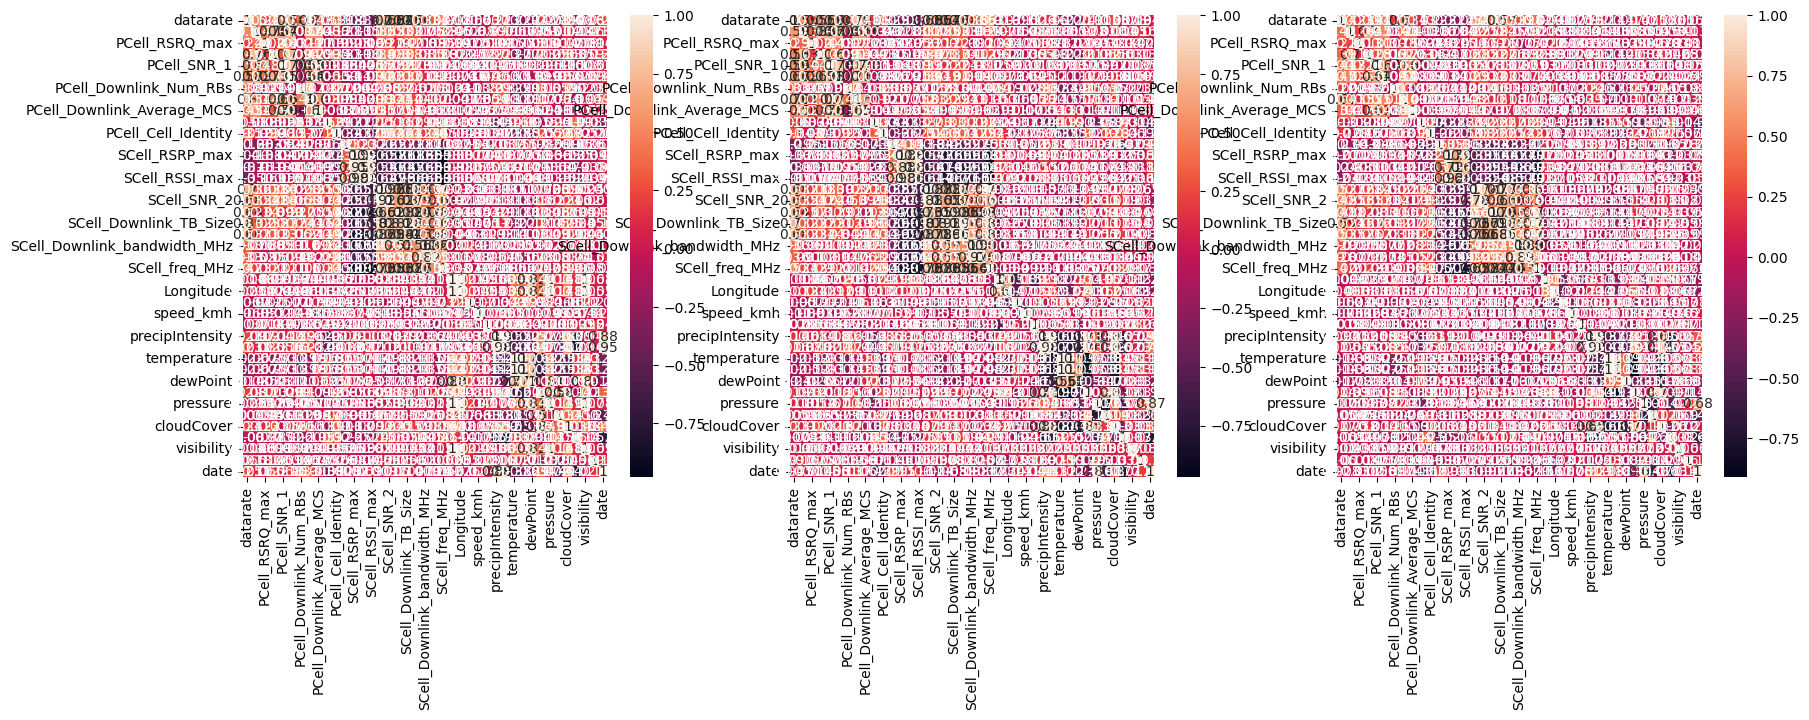

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20, 6))

sns.heatmap(informer_all.corr('pearson'), ax=ax[0], annot=True)
sns.heatmap(informer_all.corr('spearman'), ax=ax[1], annot=True)
sns.heatmap(informer_all.corr('kendall'), ax=ax[2], annot=True)

In [33]:
def multi_corr(feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = informer_all.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = informer_all.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = informer_all.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

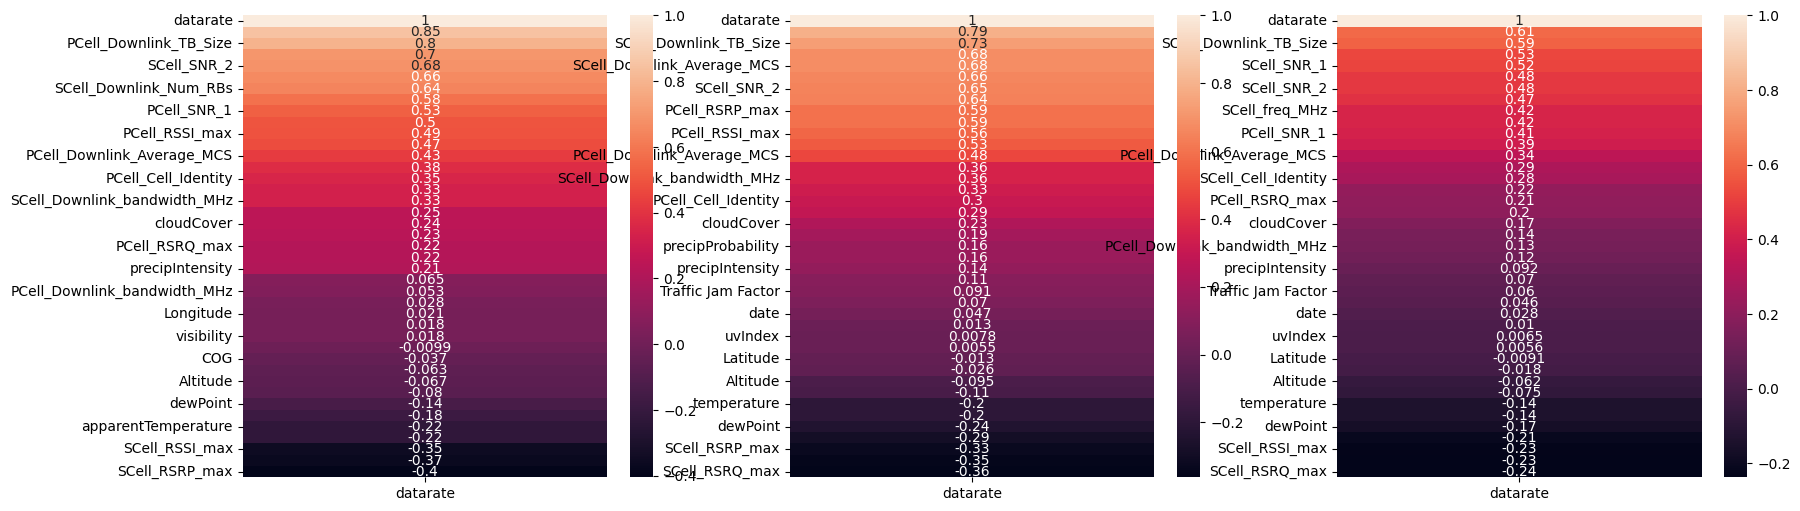

In [34]:
multi_corr('datarate')